# Trading Signals - EWMA

In [3]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import Markdown
%matplotlib inline

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

In [4]:
# Specify the stock ticker 
ticker = 'TSLA'

In [5]:
# Set the file path
filepath = Path("Resources/stock_data.csv")

# Read the CSV located at the file path into a Pandas DataFrame
stock_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

stock_df = stock_df.sort_index()
stock_df.drop('Unnamed: 0', inplace=True, axis=1)

stock_df.tail()

,date,open,high,low,close,volume
248,2020-12-22,648.00,649.8800,614.2300,640.09,49801682
249,2020-12-23,632.20,651.4999,622.5701,645.98,31228561
250,2020-12-24,642.99,666.0900,641.0000,661.66,22073561
251,2020-12-28,674.51,681.4000,660.8000,663.77,29644945
252,2020-12-29,661.00,669.9000,655.0000,665.98,21166506


In [6]:
# Calculate daily return and add it to the dataframe column

stock_df['daily_return'] = stock_df['close'].dropna().pct_change()

In [7]:
stock_df.head()

,date,open,high,low,close,volume,daily_return
0,2019-12-30,428.8100,429.0000,409.2589,414.6200,12082466,NaN
1,2019-12-31,405.0003,421.2900,402.0800,418.1700,9761539,0.008562
2,2020-01-02,424.9500,430.6957,421.7100,430.2400,9113793,0.028864
3,2020-01-03,440.5000,454.0000,436.9200,442.7500,16409329,0.029077
4,2020-01-06,440.4700,451.5600,440.0000,451.4001,9807049,0.019537


In [8]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_close'] = stock_df['close'].ewm(halflife=short_window).mean()
stock_df['slow_close'] = stock_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
stock_df['crossover_long'] = np.where(stock_df['fast_close'] > stock_df['slow_close'], 1.0, 0.0)
stock_df['crossover_short'] = np.where(stock_df['fast_close'] < stock_df['slow_close'], -1.0, 0.0)
stock_df['crossover_signal'] = stock_df['crossover_long'] + stock_df['crossover_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,2019-12-30,428.8100,429.0000,409.2589,414.6200,12082466,NaN,414.620000,414.620000,0.0,0.0,0.0
1,2019-12-31,405.0003,421.2900,402.0800,418.1700,9761539,0.008562,416.986667,416.456492,1.0,0.0,1.0
2,2020-01-02,424.9500,430.6957,421.7100,430.2400,9113793,0.028864,424.560000,421.372881,1.0,0.0,1.0
3,2020-01-03,440.5000,454.0000,436.9200,442.7500,16409329,0.029077,434.261333,427.284963,1.0,0.0,1.0
4,2020-01-06,440.4700,451.5600,440.0000,451.4001,9807049,0.019537,443.107148,432.798640,1.0,0.0,1.0


<AxesSubplot:>

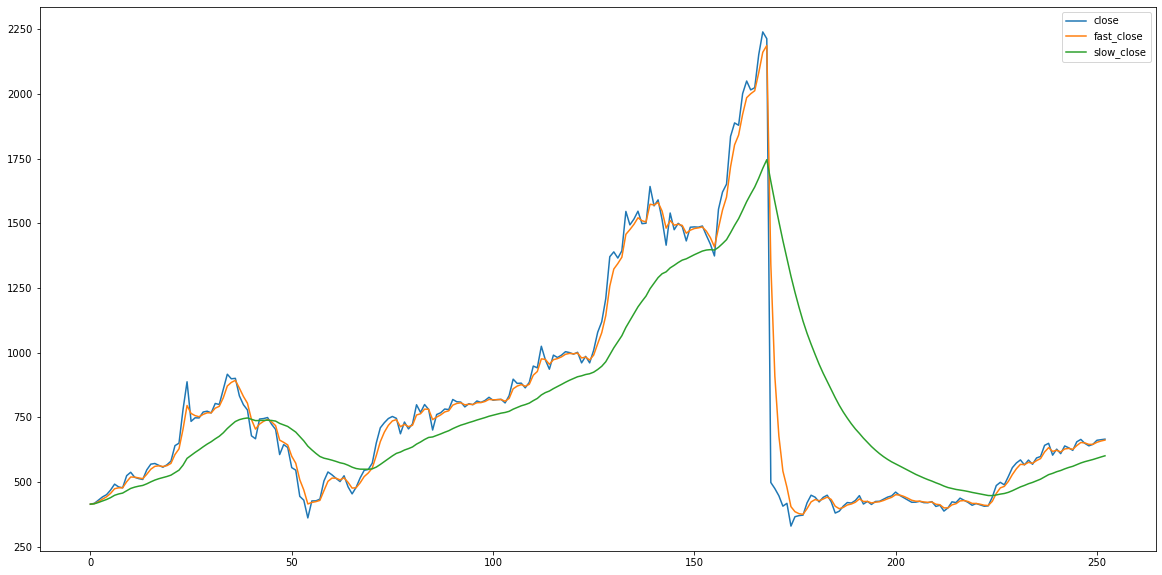

In [9]:
# Plot the EWMA of the stock closing prices
stock_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [10]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_vol'] = stock_df['daily_return'].ewm(halflife=short_vol_window).std()
stock_df['slow_vol'] = stock_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
stock_df['vol_trend_long'] = np.where(stock_df['fast_vol'] < stock_df['slow_vol'], 1.0, 0.0)
stock_df['vol_trend_short'] = np.where(stock_df['fast_vol'] > stock_df['slow_vol'], -1.0, 0.0) 
stock_df['vol_trend_signal'] = stock_df['vol_trend_long'] + stock_df['vol_trend_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
0,2019-12-30,428.8100,429.0000,409.2589,414.6200,12082466,NaN,414.620000,414.620000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,2019-12-31,405.0003,421.2900,402.0800,418.1700,9761539,0.008562,416.986667,416.456492,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2,2020-01-02,424.9500,430.6957,421.7100,430.2400,9113793,0.028864,424.560000,421.372881,1.0,0.0,1.0,0.014356,0.014356,0.0,0.0,0.0
3,2020-01-03,440.5000,454.0000,436.9200,442.7500,16409329,0.029077,434.261333,427.284963,1.0,0.0,1.0,0.009464,0.011577,1.0,0.0,1.0
4,2020-01-06,440.4700,451.5600,440.0000,451.4001,9807049,0.019537,443.107148,432.798640,1.0,0.0,1.0,0.007453,0.009423,1.0,0.0,1.0


<AxesSubplot:>

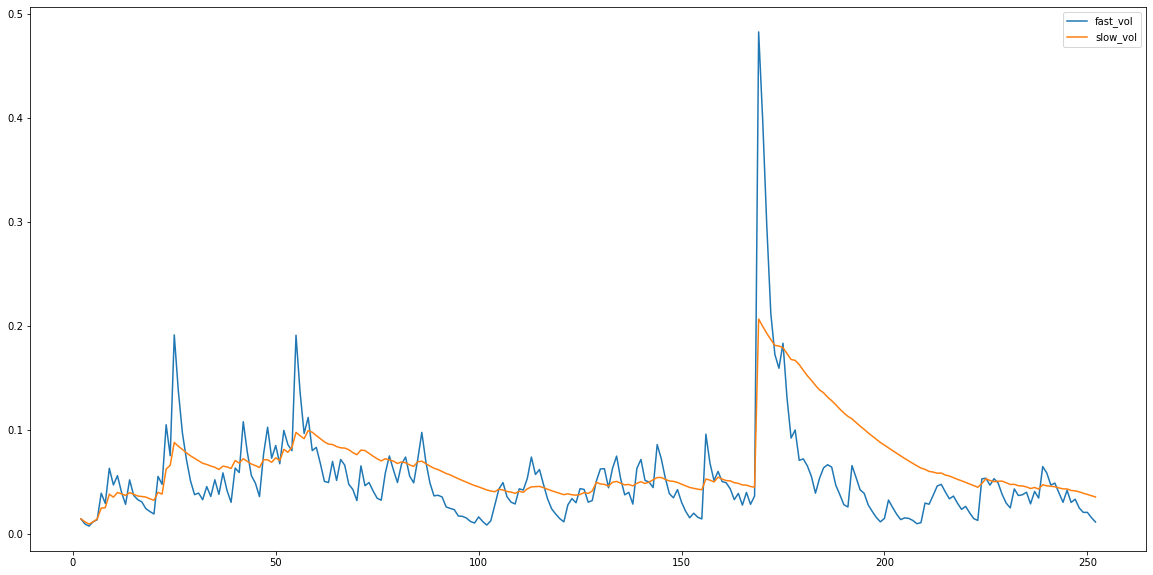

In [11]:
# Plot the EWMA of the stock daily return volatility
stock_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [12]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
stock_df['bollinger_mid_band'] = stock_df['close'].rolling(window=bollinger_window).mean()
stock_df['bollinger_std'] = stock_df['close'].rolling(window=bollinger_window).std()

# Calculate upper and lowers bands of bollinger band
stock_df['bollinger_upper_band']  = stock_df['bollinger_mid_band'] + (stock_df['bollinger_std'] * 1)
stock_df['bollinger_lower_band']  = stock_df['bollinger_mid_band'] - (stock_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
stock_df['bollinger_long'] = np.where(stock_df['close'] < stock_df['bollinger_lower_band'], 1.0, 0.0)
stock_df['bollinger_short'] = np.where(stock_df['close'] > stock_df['bollinger_upper_band'], -1.0, 0.0)
stock_df['bollinger_signal'] = stock_df['bollinger_long'] + stock_df['bollinger_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
0,2019-12-30,428.8100,429.0000,409.2589,414.6200,12082466,NaN,414.620000,414.620000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2019-12-31,405.0003,421.2900,402.0800,418.1700,9761539,0.008562,416.986667,416.456492,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2020-01-02,424.9500,430.6957,421.7100,430.2400,9113793,0.028864,424.560000,421.372881,1.0,0.0,1.0,0.014356,0.014356,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2020-01-03,440.5000,454.0000,436.9200,442.7500,16409329,0.029077,434.261333,427.284963,1.0,0.0,1.0,0.009464,0.011577,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2020-01-06,440.4700,451.5600,440.0000,451.4001,9807049,0.019537,443.107148,432.798640,1.0,0.0,1.0,0.007453,0.009423,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


<AxesSubplot:>

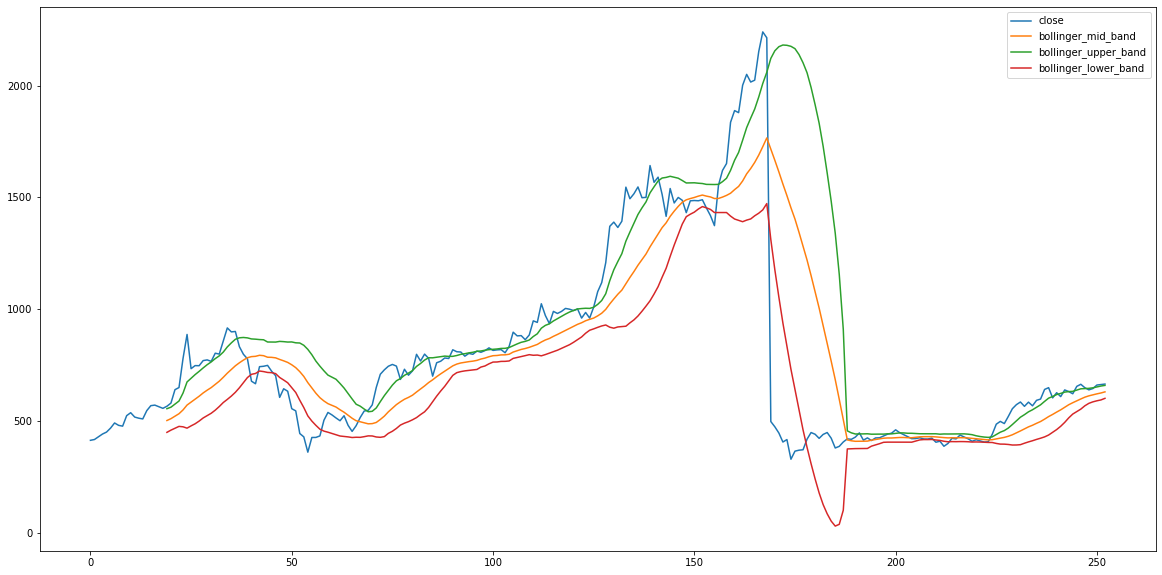

In [13]:
# Plot the Bollinger Bands for the stock closing prices
stock_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [15]:
# Create .csv file with features to feed into random forrest model

stock_df.to_csv("Resources/trading_ewma_signals.csv")